# 時系列データとは

**気温の遷移や降水状況などの気象データや株価、為替の値動きなど、時間的に連続して変化するデータのこと**

In [1]:
# ライブラリの読み込みと各種設定
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
# グラフの日本語設定
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']
plt.rcParams['figure.figsize'] = 20, 5

## データの読み込み

今回使用するデータは、気温の時系列データです。

データ配布元：http://www.data.jma.go.jp/gmd/risk/obsdl/index.php

In [2]:
weather_df = pd.read_csv("./data/weather.csv", index_col='年月日', encoding="shift-jis")

In [3]:
weather_df

,平均気温(℃),降水量の合計(mm),平均風速(m/s),日照時間(時間),平均現地気圧(hPa)
年月日,,,,,
2015/1/1,3.7,0.0,4.4,1.3,1000.4
2015/1/2,2.7,0.0,2.1,6.0,1007.4
2015/1/3,3.8,0.0,3.0,8.9,1012.0
2015/1/4,4.0,0.0,1.3,6.0,1010.4
2015/1/5,6.9,0.0,2.4,8.9,1014.6
...,...,...,...,...,...
2019/12/28,6.8,0.0,3.5,8.8,1019.9
2019/12/29,7.0,0.0,1.9,8.3,1026.5
2019/12/30,6.7,0.5,1.8,0.0,1021.0


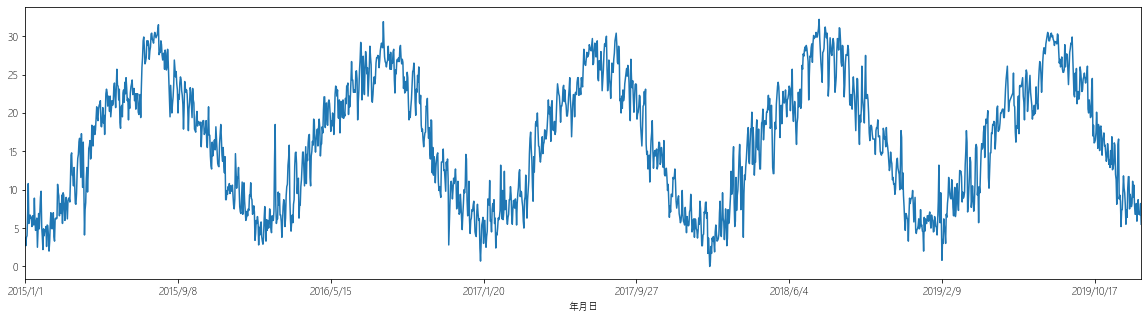

In [4]:
weather_df['平均気温(℃)'].plot()

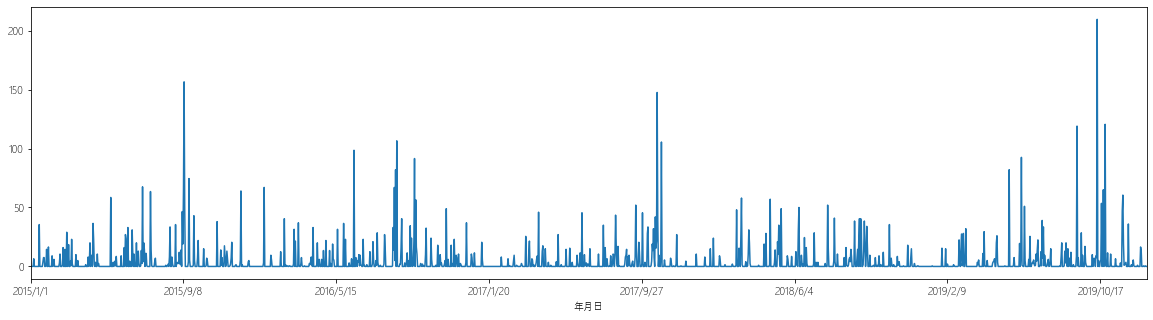

In [5]:
weather_df['降水量の合計(mm)'].plot()

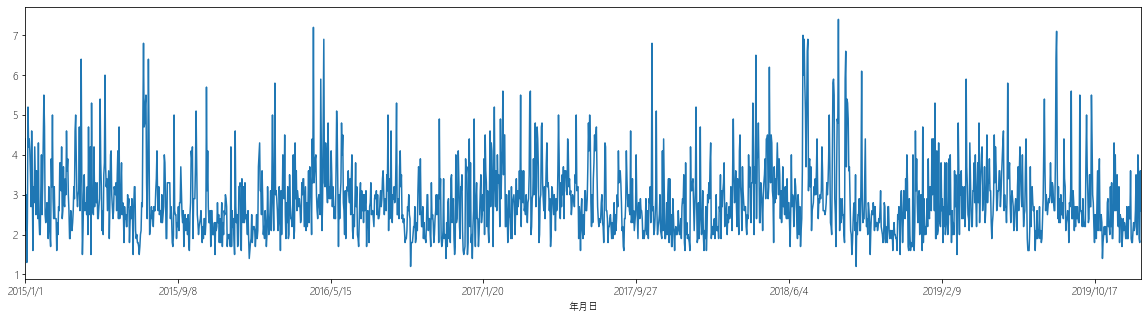

In [6]:
weather_df['平均風速(m/s)'].plot()

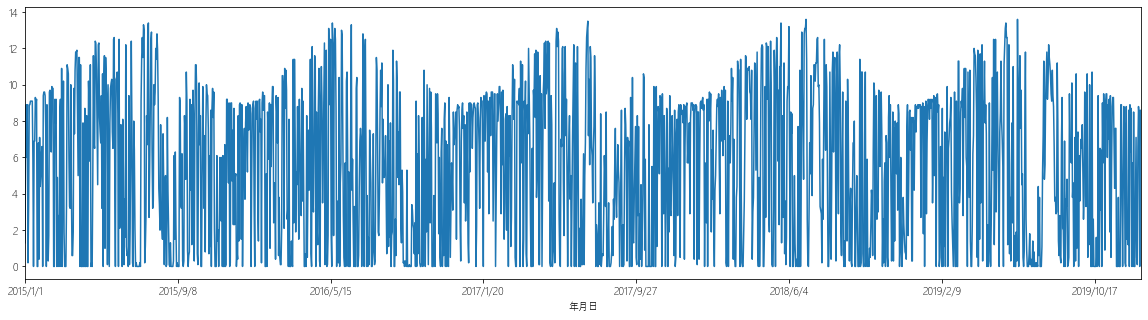

In [7]:
weather_df['日照時間(時間)'].plot()

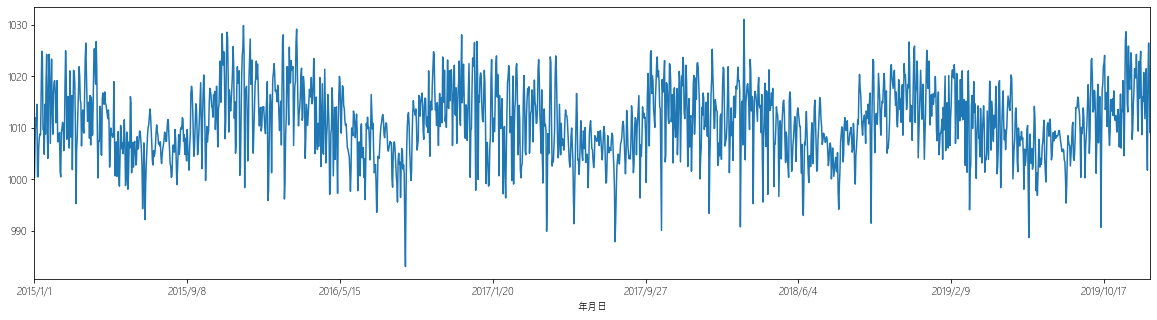

In [8]:
weather_df['平均現地気圧(hPa)'].plot()

## 定常性の分析

定常性：時間や位置によってその確率分布が変化しないという確率過程の性質

非定常のデータは分析には適しません。定常過程に変換してやることで初めて分析可能になります。

よって、時系列データを扱うときは、まず定常性の検定を行い、非定常過程なら定常過程に変換してやる必要があります。

有名な検定方法として、**ADF検定**があります。

## ADF検定

**帰無仮説**を「単位根過程」

**対立仮説**を「定常過程」

よって、P値が0.05以下なら、帰無仮説が棄却され、「定常過程」となります。


### 単位根過程とは

原系列 Yt が非定常過程であり、差分系列ΔYt = Yt − Yt−1 が定常過程であるとき、過程は単位根過程といわれる

In [10]:
# ライブラリの読み込み
from statsmodels.tsa import stattools

In [11]:
# ADF検定のP値の求め方
stattools.adfuller(weather_df['平均現地気圧(hPa)'])[1]

0.0075810935964328325

In [12]:
# ADF検定を各カラムに対して行う
adf_df=pd.DataFrame(
    [
        stattools.adfuller(weather_df['平均気温(℃)'])[1],
        stattools.adfuller(weather_df['降水量の合計(mm)'])[1],
        stattools.adfuller(weather_df['平均風速(m/s)'])[1],
        stattools.adfuller(weather_df['日照時間(時間)'])[1],
        stattools.adfuller(weather_df['平均現地気圧(hPa)'])[1]
    ],
    index=['平均気温(℃)','降水量の合計(mm)','平均風速(m/s)','日照時間(時間)','平均現地気圧(hPa)'],
    columns=['P値']
)
adf_df

,P値
平均気温(℃),2.140411e-01
降水量の合計(mm),1.766563e-16
平均風速(m/s),1.899823e-08
日照時間(時間),9.449214e-30
平均現地気圧(hPa),7.581094e-03


## 定常性を持たせるには

一般的に「**差分系列**」を取ったり、「**対数変換**」すると、その系列は定常性を持ちやすくなるといわれています。

In [30]:
# 差分系列
adf_df=pd.DataFrame(
    [
        stattools.adfuller(weather_df['平均気温(℃)'].diff(periods = 1)[1:])[1],
        stattools.adfuller(weather_df['降水量の合計(mm)'][1:])[1],
        stattools.adfuller(weather_df['平均風速(m/s)'][1:])[1],
        stattools.adfuller(weather_df['日照時間(時間)'][1:])[1],
        stattools.adfuller(weather_df['平均現地気圧(hPa)'][1:])[1]
    ],
    index=['平均気温(℃)','降水量の合計(mm)','平均風速(m/s)','日照時間(時間)','平均現地気圧(hPa)'],
    columns=['P値']
)
adf_df

,P値
平均気温(℃),8.325754e-21
降水量の合計(mm),1.765212e-16
平均風速(m/s),1.943199e-08
日照時間(時間),9.475578e-30
平均現地気圧(hPa),7.658150e-03


本来は差分系列を用いて、分析しないといけませんが、今回は演習のため、そのままのデータを用いて、講座を進めます。

## コレログラム

自己相関グラフを作成する。

自己相関：自身を時間シフトした系列とどれだけ良く整合するか

偏自己相関：自身を時間シフトした系列とどれだけ良く整合するか（本当に相関している次数を探す）

＊次数：時間シフトの量

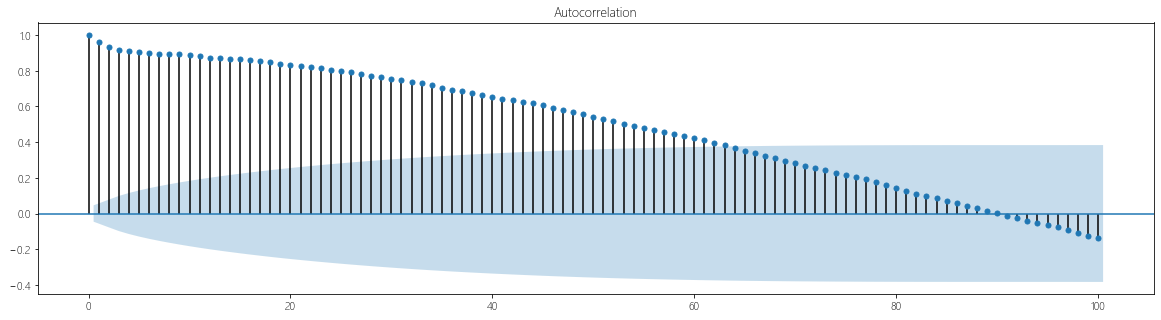

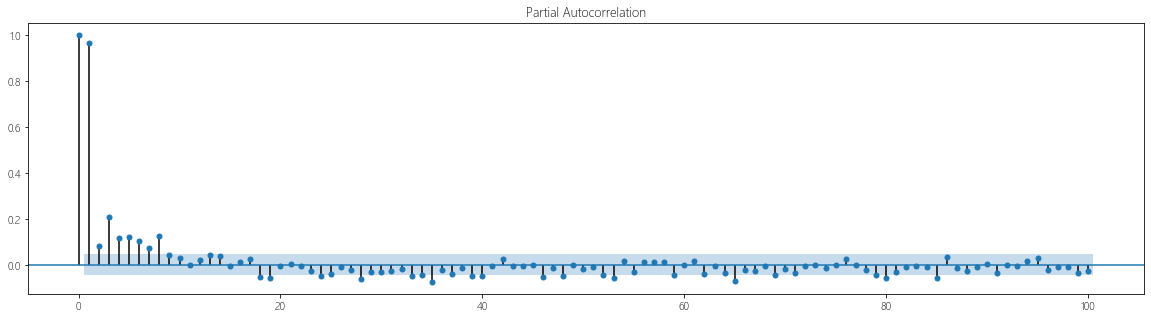

In [36]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(weather_df['平均気温(℃)'], lags=100)
sm.graphics.tsa.plot_pacf(weather_df['平均気温(℃)'], lags=100)
plt.show()

In [39]:
# 数値で求める
ts_acf = sm.tsa.stattools.acf(weather_df['平均気温(℃)'], nlags=40)
ts_pacf = sm.tsa.stattools.pacf(weather_df['平均気温(℃)'], nlags=40)

print(ts_acf)
print(ts_pacf)

[1.         0.96253622 0.93229889 0.91743874 0.90776649 0.90145859
 0.89753416 0.89341044 0.893283   0.89107803 0.88622238 0.8792947
 0.87318109 0.86954758 0.86751239 0.8629805  0.85850054 0.85538077
 0.84805983 0.83750863 0.8296837  0.82445985 0.81986571 0.8138739
 0.80533808 0.79649003 0.78974556 0.78270859 0.77242539 0.76260605
 0.75416844 0.74651238 0.73880863 0.72845182 0.71726354 0.70446103
 0.69344259 0.68296094 0.67366822 0.66287573 0.65099831]
[ 1.00000000e+00  9.63063349e-01  8.03979617e-02  2.07355600e-01
  1.14419709e-01  1.18512375e-01  1.03672029e-01  7.06251270e-02
  1.25190964e-01  4.30919201e-02  3.07606020e-02  8.20377696e-05
  2.01991813e-02  3.95398042e-02  3.89142448e-02 -6.22495583e-03
  1.33597763e-02  2.21926530e-02 -5.35078726e-02 -5.99054192e-02
 -7.42474373e-03  1.36668064e-03 -7.48436252e-03 -2.88393726e-02
 -4.98707062e-02 -3.91199599e-02 -9.36528645e-03 -2.42148983e-02
 -6.26099285e-02 -3.03360211e-02 -3.06960770e-02 -2.69369488e-02
 -2.12087234e-02 -5.157